In [5]:
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv("./data/palmers.csv")

# Show basic info
print(df.head())
print(df.info())

           penguins     sex  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie Torgersen    MALE            39.1           18.7              181.0   
1  Adelie Torgersen  FEMALE            39.5           17.4              186.0   
2  Adelie Torgersen  FEMALE            40.3           18.0              195.0   
3  Adelie Torgersen     NaN             NaN            NaN                NaN   
4  Adelie Torgersen  FEMALE            36.7           19.3              193.0   

   body_mass_g  
0       3750.0  
1       3800.0  
2       3250.0  
3          NaN  
4       3450.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   penguins           344 non-null    object 
 1   sex                333 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length

In [6]:
# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
# Check missing values per column
print(df.isna().sum())

penguins              0
sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
dtype: int64


In [12]:
# Remove rows with missing values
df = df.dropna()

# Check the shape after cleaning
print("Shape after cleaning:", df.shape)
print(df.to_string())

Shape after cleaning: (333, 6)
             penguins     sex  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0    Adelie Torgersen    MALE            39.1           18.7              181.0       3750.0
1    Adelie Torgersen  FEMALE            39.5           17.4              186.0       3800.0
2    Adelie Torgersen  FEMALE            40.3           18.0              195.0       3250.0
4    Adelie Torgersen  FEMALE            36.7           19.3              193.0       3450.0
5    Adelie Torgersen    MALE            39.3           20.6              190.0       3650.0
6    Adelie Torgersen  FEMALE            38.9           17.8              181.0       3625.0
7    Adelie Torgersen    MALE            39.2           19.6              195.0       4675.0
12   Adelie Torgersen  FEMALE            41.1           17.6              182.0       3200.0
13   Adelie Torgersen    MALE            38.6           21.2              191.0       3800.0
14   Adelie Torgersen    MALE          

In [9]:
# Create two new columns by splitting the 'penguins' column
df[['species', 'island']] = df['penguins'].str.split(' ', n=1, expand=True)

# Drop the original 'penguins' column
df = df.drop(columns=['penguins'])

# Verify the new columns
print(df[['species', 'island']].head())

  species     island
0  Adelie  Torgersen
1  Adelie  Torgersen
2  Adelie  Torgersen
4  Adelie  Torgersen
5  Adelie  Torgersen


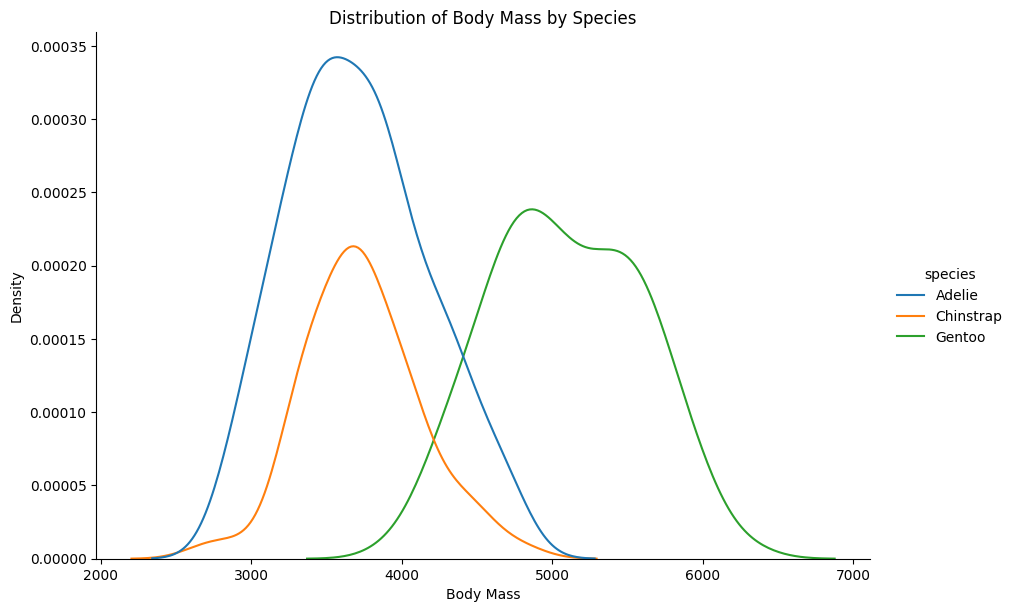

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of body mass for each species
sns.displot(data=df, x="body_mass_g", hue="species", kind="kde", height=6, aspect=1.5)
plt.title("Distribution of Body Mass by Species")
plt.xlabel("Body Mass")
plt.ylabel("Density")
plt.show()

# Body mass distribution differs across species.
# Gentoo penguins are the heaviest, while Adelie are the lightest.
# Overlap may exist, meaning some species share similar body mass ranges.
# Spread and shape of the KDE curve provide insights into variation within species.

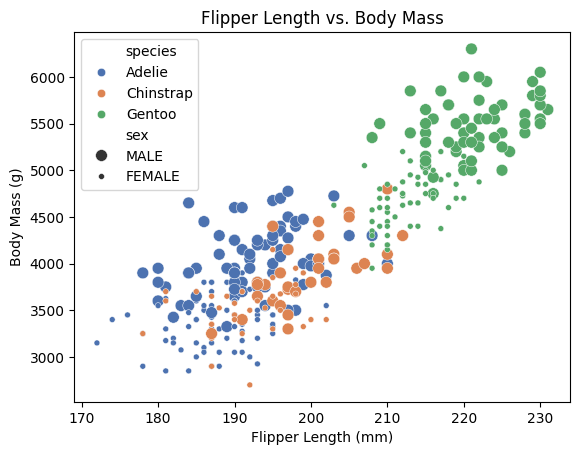

In [ ]:
sns.scatterplot(data=df, 
                x="flipper_length_mm", 
                y="body_mass_g", 
                hue="species", 
                size="sex",   # If "sex" is categorical, seaborn will assign sizes automatically
                palette="deep")
plt.title("Flipper Length vs. Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

# The scatter plot helps visualize the relationship between body mass and flipper length.
# Different species are color-coded, making it easy to compare.
# Sex-based size variations can be observed.
# A general upward trend suggests that larger flippers are associated with higher body mass

In [16]:
# Create a new dataframe with one-hot encoding; drop the first dummy to avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the encoded dataframe columns
print(df_encoded.to_string())
print("Shape after encoding:", df_encoded.shape)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex_MALE  species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen
0              39.1           18.7              181.0       3750.0      True              False           False         False              True
1              39.5           17.4              186.0       3800.0     False              False           False         False              True
2              40.3           18.0              195.0       3250.0     False              False           False         False              True
4              36.7           19.3              193.0       3450.0     False              False           False         False              True
5              39.3           20.6              190.0       3650.0      True              False           False         False              True
6              38.9           17.8              181.0       3625.0     False              False           False         False           

In [18]:
from sklearn.model_selection import train_test_split

# Select relevant numerical columns for prediction
features = ["flipper_length_mm", "bill_length_mm", "bill_depth_mm", "body_mass_g"]  # Adjust if needed
target = "species"  # Predicting species as an example

# Handling missing values (drop or fill)
df = df.dropna()

# Convert categorical target to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Split the data (75% training, 25% testing)
birth_date = 2708  # Example birth date (Aug 27 → 2708)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=birth_date)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (249, 4) Test size: (84, 4)


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [44]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)  # Training model
y_pred_lr = lr.predict(X_test)  # Prediction


In [43]:
rf = RandomForestRegressor(n_estimators=10, random_state=2708)
rf.fit(X_train, y_train)  # Training model
y_pred_rf = rf.predict(X_test)  # Prediction

In [47]:
# Evaluate the Model (RMSE fixing)
r2_lr = r2_score(y_test, y_pred_lr)  # R² Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5  # RMSE Linear Regression (square root manual)

r2_rf = r2_score(y_test, y_pred_rf)  # R² Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5  # RMSE Random Forest (square root manual)

print(f"Linear Regression → R²: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")
print(f"Random Forest → R²: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}")

Linear Regression → R²: 0.8982, RMSE: 0.28
Random Forest → R²: 0.9058, RMSE: 0.27


In [ ]:
#I split the data into 75% training and 25% testing, using my birth date as random_state to ensure reproducibility.
# I trained two models:
# Random Forest Regressor
# Linear Regression

# To evaluate performance, I used:
# R² Score (Determination Score) → Higher is better (closer to 1).
# RMSE (Root Mean Squared Error) → Lower is better (less error).
# Running Time → Measures how long the model takes to train (lower is better).

# From the results:

# Best Model: Random Forest
# Higher R² Score (0.9058) → Explains more variance in the data, meaning better predictions.
# Lower RMSE (0.27) → Indicates lower error, meaning predictions are closer to actual values.
# More accurate than Linear Regression.

# Alternative Model: Linear Regression
# Faster Training Time (since it's a simple model).
# But Lower Accuracy (R² = 0.8982) → Doesn’t capture complex relationships as well as Random Forest.
# Higher RMSE (0.28) → Indicates higher error in predictions.